In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls ./movielens/

Icon?             genome-scores.csv links.csv         ratings.csv
README.txt        genome-tags.csv   movies.csv        tags.csv


In [4]:
movies = pd.read_csv('./movielens/movies.csv')
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [5]:
ratings = pd.read_csv('./movielens/ratings.csv')
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [6]:
tags = pd.read_csv('./movielens/tags.csv')
tags.isnull().any()


userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [7]:
tags.shape

(465564, 4)

In [8]:
tags= tags.dropna()
tags.shape

(465548, 4)

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [11]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [12]:
highly_rated = ratings['rating'] >= 4
ratings[highly_rated].head()

,userId,movieId,rating,timestamp
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826
10,1,293,4.0,1112484703


In [13]:
is_thriller = movies['genres'].str.contains('Thriller')
is_mystery = movies['genres'].str.contains('Mystery')
movies[is_thriller & is_mystery].head()

,movieId,title,genres
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
101,103,Unforgettable (1996),Mystery|Sci-Fi|Thriller


In [14]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


In [15]:
average_ratings = ratings[['movieId','rating','timestamp']].groupby('movieId').mean()
average_ratings.head()

,rating,timestamp
movieId,,
1,3.921240,1.052654e+09
2,3.211977,1.037616e+09
3,3.151040,9.596480e+08
4,2.861393,9.242144e+08
5,3.064592,9.620161e+08


In [17]:
box_office = ratings[highly_rated]
box_office.head()

,userId,movieId,rating,timestamp
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826
10,1,293,4.0,1112484703


In [18]:
box_office = movies.merge(average_ratings, on='movieId', how='inner')
box_office.head()

,movieId,title,genres,year,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240,1.052654e+09
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977,1.037616e+09
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040,9.596480e+08
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393,9.242144e+08
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592,9.620161e+08


In [19]:
highly_rated = box_office['rating'] >= 4
box_office[highly_rated].head()

,movieId,title,genres,year,rating,timestamp
27,28,Persuasion (1995),Drama|Romance,1995,4.057546,9.774059e+08
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,4.053493,1.056203e+09
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995,4.334372,1.070442e+09
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,1995,4.004925,9.397648e+08
108,110,Braveheart (1995),Action|Drama|War,1995,4.042534,1.042038e+09


In [20]:
is_thriller = box_office['genres'].str.contains('Thriller')
is_mystery = box_office['genres'].str.contains('Mystery')
box_office[is_thriller].head()

,movieId,title,genres,year,rating,timestamp
5,6,Heat (1995),Action|Crime|Thriller,1995,3.834930,1.005759e+09
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,3.430029,9.843062e+08
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,1995,2.880754,9.737709e+08
20,21,Get Shorty (1995),Comedy|Crime|Thriller,1995,3.581689,9.592449e+08
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,1995,3.319400,9.700948e+08


In [21]:
box_office['parsed_time'] = pd.to_datetime(tags['timestamp'],unit='s')
box_office.head()

,movieId,title,genres,year,rating,timestamp,parsed_time
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240,1.052654e+09,2009-04-24 18:19:40
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977,1.037616e+09,2013-05-10 01:41:18
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040,9.596480e+08,2013-05-10 01:41:19
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393,9.242144e+08,2013-05-10 01:39:43
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592,9.620161e+08,2013-05-10 01:41:18


In [22]:
del box_office['timestamp']
box_office.head()

,movieId,title,genres,year,rating,parsed_time
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240,2009-04-24 18:19:40
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977,2013-05-10 01:41:18
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040,2013-05-10 01:41:19
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393,2013-05-10 01:39:43
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592,2013-05-10 01:41:18


In [70]:
greater_than_t = box_office['parsed_time'] > '2015-02-01'

selected_rows = box_office[greater_than_t]

box_office.sort_values(by='parsed_time', ascending=True)[:10]

selected_rows.head()

,movieId,title,genres,year,rating,parsed_time
301,304,Roommates (1995),Comedy|Drama,1995,3.198895,2015-02-20 22:42:49
302,305,Ready to Wear (Pret-A-Porter) (1994),Comedy,1994,2.706037,2015-02-20 22:42:49
303,306,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,1994,4.089562,2015-02-20 22:42:49
304,307,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,1993,3.993185,2015-02-21 15:58:30
305,308,Three Colors: White (Trzy kolory: Bialy) (1994),Comedy|Drama,1994,3.913250,2015-02-21 15:58:03


In [83]:
thriller = box_office[is_thriller & greater_than_t]
mystery = box_office[is_mystery & greater_than_t]



mystery_compare = mystery[['year','rating']].groupby('year', as_index=False).mean()


thriller_compare = thriller[['year','rating']].groupby('year', as_index=False).mean()


thriller_compare.head()



,year,rating
0,1950,2.500000
1,1955,2.875000
2,1958,3.388889
3,1959,2.500000
4,1964,3.400000


Text(0.5,1,'Ratings of Mystery Movies by IMDB Users')

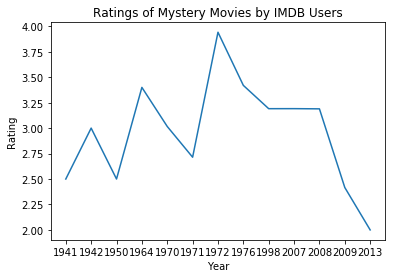

In [78]:
# yearly_average_mystery = mystery_compare[['year','rating']].groupby('year', as_index=False).mean()

# yearly_average_thriller = thriller_compare[['year','rating']].groupby('year', as_index=False).mean()

# mystery_compare[:20].plot(x='year', y='rating', figsize=(15,10), grid=True)

top_20_mystery = mystery_compare[:20]

plt.plot(top_20_mystery['year'].values, top_20_mystery['rating'].values) 
 
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Ratings of Mystery Movies by IMDB Users') 



,year,rating
0,1950,2.500000
1,1955,2.875000
2,1958,3.388889
3,1959,2.500000
4,1964,3.400000


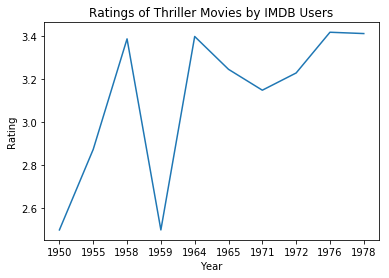

In [87]:
top_20_thriller = thriller_compare[:10]

plt.plot(top_20_thriller['year'].values, top_20_thriller['rating'].values) 
 
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Ratings of Thriller Movies by IMDB Users') 

top_20_thriller.head()